In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [2]:
df = pd.read_csv("./Data/GOOG.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


In [55]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df = df.sort_values(by='Date')
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df['Date'] = pd.to_datetime(df['Date'])
# Set 'date' column as index
df = df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


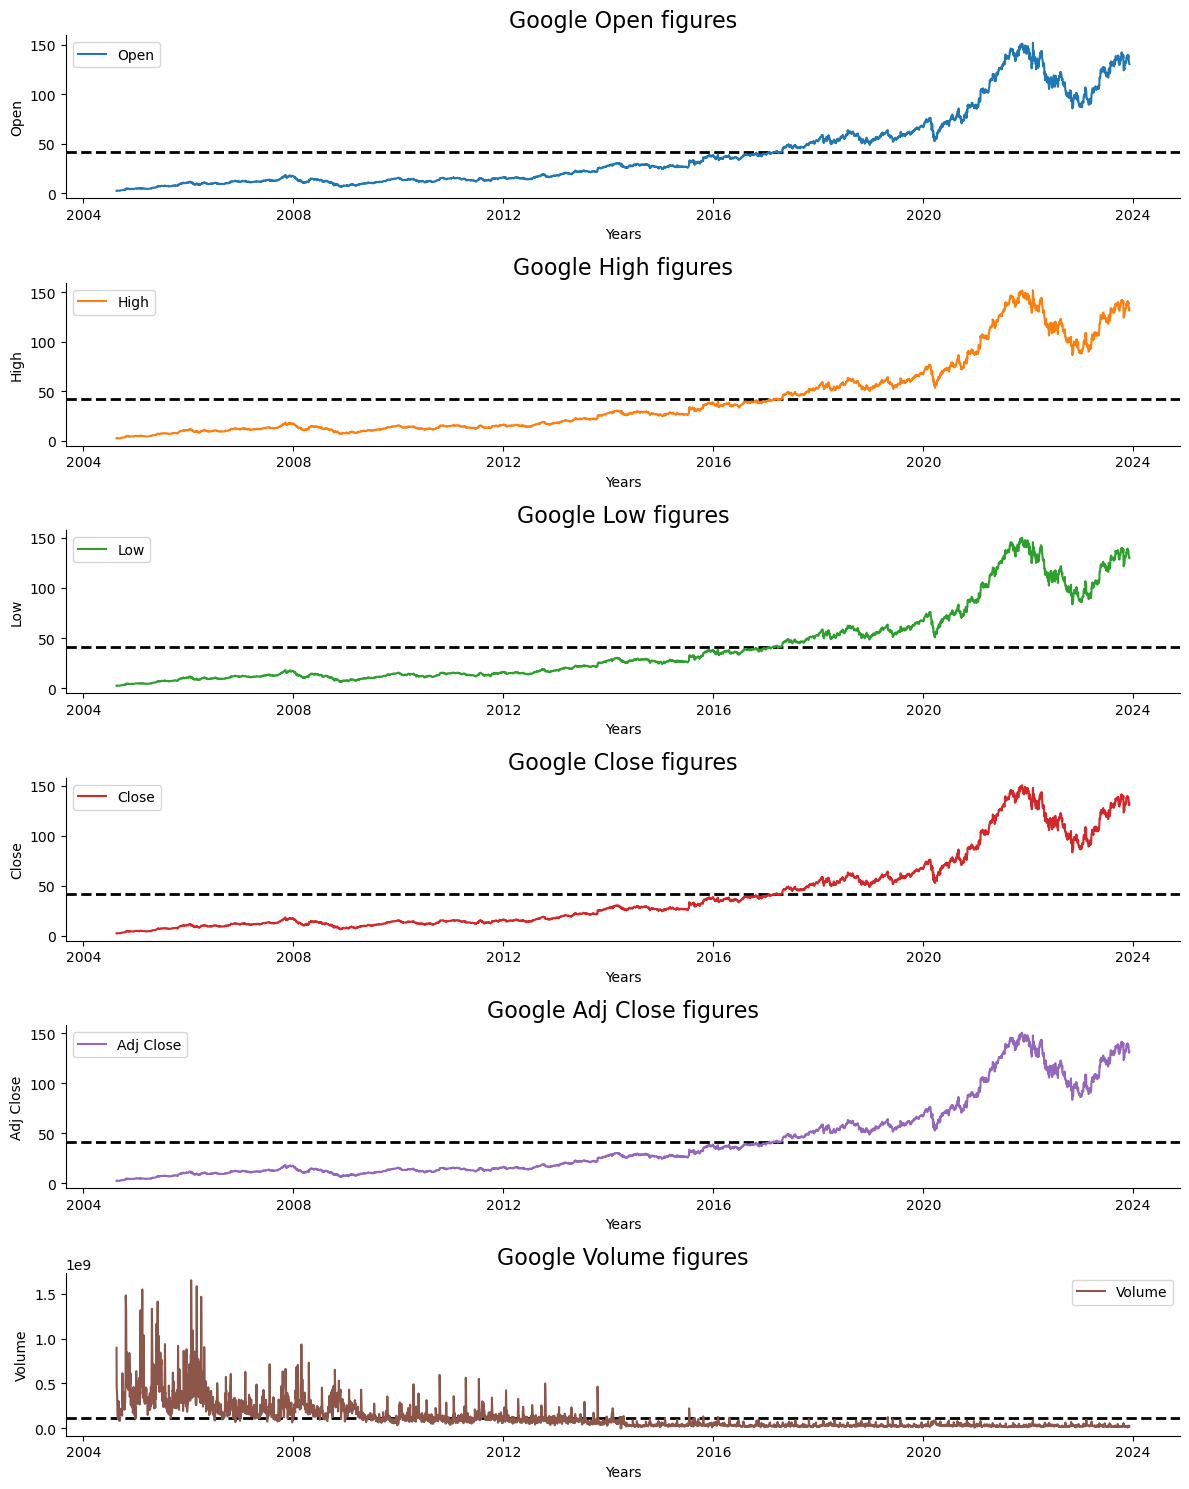

In [57]:
# This code plots columns in a dataframe.

# The number of rows, columns, and the subplot counter are initialized. 
a = 6  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

colors = plt.rcParams["axes.prop_cycle"]()
# A figure is initialized 
fig = plt.figure(figsize=(12,15))

for i in range(len(df.columns)):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    #Plotting the line for each column in a different color
    plt.plot(df[df.columns[i]], color = color)
    # The spines of each plot are made invisible and the figure is adjusted and shown.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Adding a horizontal line for the average of the column
    plt.axhline(df[df.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')
    #Adding Title
    plt.title("Google "+ df.columns[i] + " figures", fontsize=16)
    plt.xlabel('Years')
    #Adding y axis label
    plt.ylabel(df.columns[i])
    #Adding Legend
    plt.legend([df.columns[i]])
    #Plot Counter value is increased by one after each iteration
    c = c + 1

#Layout is tightended up
plt.tight_layout()

#plot is displayed
plt.show()

In [58]:
training_set = df[:'2020'].iloc[:,0:1].values
test_set = df['2020':].iloc[:,0:1].values

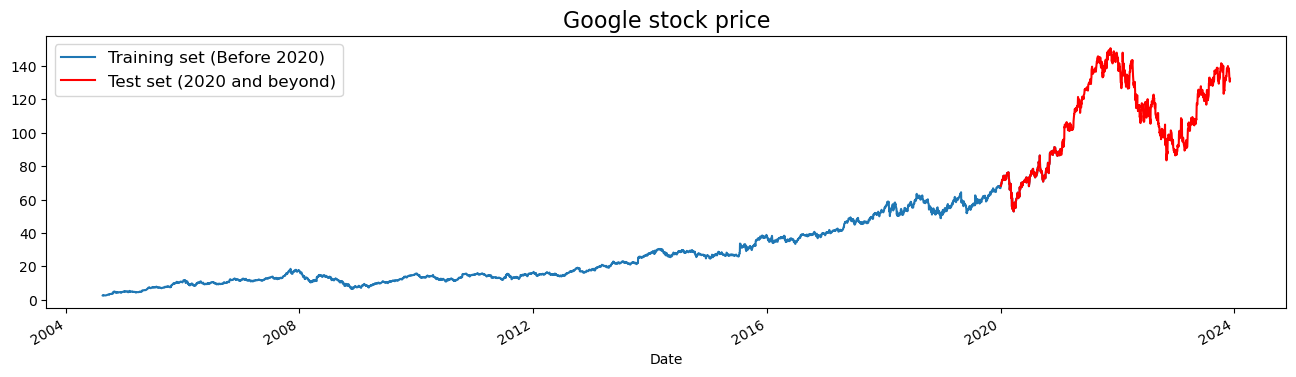

In [59]:
# Using 'close' price for prediction.
df['Close'][:'2020'].plot(figsize=(16,4),legend=True)
df['Close']['2020':].plot(figsize=(16,4),legend=True, color = 'r')
plt.legend(['Training set (Before 2020)','Test set (2020 and beyond)'], fontsize=12)
plt.title('Google stock price', fontsize=16)
plt.show()

In [60]:
scaler = MinMaxScaler()
training_set_scaled = scaler.fit_transform(training_set)

In [78]:
lag = 60

X_train = []
y_train = []
for i in range(lag, training_set.shape[0]):
    X_train.append(training_set_scaled[i-lag:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [79]:
dataset_total = pd.concat((df['Close'][:'2020'], df['Close']['2020':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - lag:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [80]:
X_test = []
for i in range(lag, len(inputs)):
    X_test.append(inputs[i-lag:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [81]:
model = Sequential()

model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

In [82]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics =['accuracy'])
history =  model.fit(X_train, y_train, epochs=15, batch_size=32)

Epoch 1/15
127/127 [==============================] - 36s 181ms/step - loss: 0.0109 - accuracy: 2.4618e-04
Epoch 2/15
127/127 [==============================] - 24s 188ms/step - loss: 0.0013 - accuracy: 2.4618e-04
Epoch 3/15
127/127 [==============================] - 25s 193ms/step - loss: 0.0012 - accuracy: 2.4618e-04
Epoch 4/15
127/127 [==============================] - 25s 195ms/step - loss: 0.0011 - accuracy: 2.4618e-04
Epoch 5/15
127/127 [==============================] - 25s 198ms/step - loss: 9.4614e-04 - accuracy: 2.4618e-04
Epoch 6/15
127/127 [==============================] - 25s 197ms/step - loss: 8.9230e-04 - accuracy: 2.4618e-04
Epoch 7/15
127/127 [==============================] - 25s 199ms/step - loss: 8.5130e-04 - accuracy: 2.4618e-04
Epoch 8/15
127/127 [==============================] - 25s 198ms/step - loss: 7.4317e-04 - accuracy: 2.4618e-04
Epoch 9/15
127/127 [==============================] - 25s 200ms/step - loss: 7.5499e-04 - accuracy: 2.4618e-04
Epoch 10/15
127/1

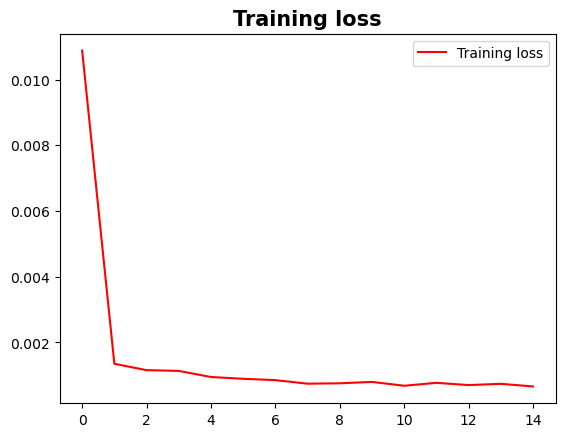

<Figure size 640x480 with 0 Axes>

In [83]:
loss = history.history['loss']
plt.plot(range(len(loss)), loss, 'r', label='Training loss')
plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()
plt.show()

In [84]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

31/31 [==============================] - 4s 57ms/step


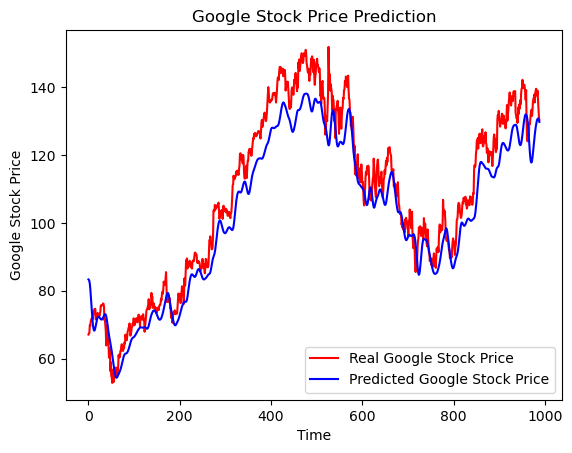

In [85]:
plt.plot(test_set, color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()